In [1]:
import pandas as pd

In [2]:
#Read data
df_org= pd.read_csv('healthcare_dataset.csv')

In [3]:
#Check data
df_org.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,17-11-2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,01-12-2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,01-06-2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,15-06-2023,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,09-01-2019,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,08-02-2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,02-05-2020,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,03-05-2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,09-07-2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,02-08-2021,Paracetamol,Normal


In [4]:
#Check data shape
df_org.shape

(10000, 15)

In [5]:
# Numerical column describe
df_org.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112565,299.000000
75%,68.000000,37733.913725,400.000000
max,85.000000,49995.902280,500.000000


In [6]:
# Name of all columns
df_org.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [7]:
# data info
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [8]:
# Creating revision for working
df = df_org

In [9]:
# Loop for identify all unique values
for i in df.columns:
    # Skip variables 'data' and 'place'
    if i in ['Name', 'Age', 'Doctor','Billing Amount','Room Number','Date of Admission','Discharge Date']:
        continue
    unique_values = df[i].unique()
    print(f"Unique values in column '{i}': {unique_values}")

Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'Blood Type': ['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']
Unique values in column 'Medical Condition': ['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
Unique values in column 'Hospital': ['Wallace-Hamilton' 'Burke, Griffin and Cooper' 'Walton LLC' ...
 'Nash-Krueger' 'Wilson-Lyons' 'Torres, Young and Stewart']
Unique values in column 'Insurance Provider': ['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']
Unique values in column 'Admission Type': ['Elective' 'Emergency' 'Urgent']
Unique values in column 'Medication': ['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']
Unique values in column 'Test Results': ['Inconclusive' 'Normal' 'Abnormal']


In [10]:
## 1st stage Basic data type cleaning and selection based on the above observations
# Name -> drop
# Age -> need
# Gender -> need
# Blood Type -> need
# Medical Condition -> unique
# Date of Admission -> Change Data Type
# Doctor -> irrelevant need to drop
# Hospital -> May be irrelevant 
# Insurance Provider -> may be irrelevant
# Billing Amount -> Dependent variable
# Room Number -> irrelevant drop
# Admission Type -> Unique
# Discharge Date -> Change to date and add one new variable 
# Medication -> relevant
# Test Results -> relevant

In [11]:
#check for all missing values 
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [12]:
df.isna().all()

Name                  False
Age                   False
Gender                False
Blood Type            False
Medical Condition     False
Date of Admission     False
Doctor                False
Hospital              False
Insurance Provider    False
Billing Amount        False
Room Number           False
Admission Type        False
Discharge Date        False
Medication            False
Test Results          False
dtype: bool

In [13]:
#1. Drop Name, Doctor, and Room Number

# Specify columns to drop as a tuple
drop_list = ['Name', 'Doctor', 'Room Number']

# Drop columns from the DataFrame using the tuple
df = df.drop(drop_list, axis=1)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  object 
 2   Blood Type          10000 non-null  object 
 3   Medical Condition   10000 non-null  object 
 4   Date of Admission   10000 non-null  object 
 5   Hospital            10000 non-null  object 
 6   Insurance Provider  10000 non-null  object 
 7   Billing Amount      10000 non-null  float64
 8   Admission Type      10000 non-null  object 
 9   Discharge Date      10000 non-null  object 
 10  Medication          10000 non-null  object 
 11  Test Results        10000 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 937.6+ KB


In [14]:
#Change object to date type Date of Admission and Discharge Date

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='%d-%m-%Y')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%d-%m-%Y')

In [15]:
df['Date of Admission'].info()
df['Discharge Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Date of Admission
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Discharge Date
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [16]:
# Grpah plot
import matplotlib.pyplot as plt

In [17]:
# Import Seaborn
import seaborn as sns

In [18]:
# New variable no of says admited
df["admited_days"] = (df['Discharge Date']-df['Date of Admission']).dt.days
df['admited_days'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: admited_days
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 10000 non-null  int64         
 1   Gender              10000 non-null  object        
 2   Blood Type          10000 non-null  object        
 3   Medical Condition   10000 non-null  object        
 4   Date of Admission   10000 non-null  datetime64[ns]
 5   Hospital            10000 non-null  object        
 6   Insurance Provider  10000 non-null  object        
 7   Billing Amount      10000 non-null  float64       
 8   Admission Type      10000 non-null  object        
 9   Discharge Date      10000 non-null  datetime64[ns]
 10  Medication          10000 non-null  object        
 11  Test Results        10000 non-null  object        
 12  admited_days        10000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), obj

In [20]:
# drop hospital, date of admission and discharge date:
drop_list2 = ['Date of Admission','Discharge Date','Hospital']
df= df.drop(drop_list2, axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  object 
 2   Blood Type          10000 non-null  object 
 3   Medical Condition   10000 non-null  object 
 4   Insurance Provider  10000 non-null  object 
 5   Billing Amount      10000 non-null  float64
 6   Admission Type      10000 non-null  object 
 7   Medication          10000 non-null  object 
 8   Test Results        10000 non-null  object 
 9   admited_days        10000 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 781.4+ KB


In [22]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,admited_days
0,81,Female,O-,Diabetes,Medicare,37490.98336,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.06485,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.89700,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.32209,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.34418,Urgent,Paracetamol,Normal,24


In [23]:
## Model building
df['temp'] = df.iloc[:, 0]  # Store the values of the first column in a temporary column
df.iloc[:,0] = df.iloc[:, 5]  # Replace the values of the first column with the values of the second column
df.iloc[:,5] = df.iloc[:,10]  # Replace the values of the second column with the values stored in the temporary column
df = df.drop('temp', axis=1)  # Drop the temporary column

C:\Users\abhib\AppData\Local\Temp\ipykernel_18252\143686467.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       37490.983360
1       47304.064850
2       36874.897000
3       23303.322090
4       18086.344180
            ...     
9995    39606.840080
9996     5995.717488
9997    49559.202900
9998    25236.344760
9999    37223.965860
Name: Billing Amount, Length: 10000, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,0] = df.iloc[:, 5]  # Replace the values of the first column with the values of the second column


In [24]:
# remane Col
df = df.rename(columns={'Age': 'Billing_Amount',
                        'Billing Amount':'Age'})

In [25]:
#change data type flot to int
df['Billing_Amount'].astype(int)

0       37490
1       47304
2       36874
3       23303
4       18086
        ...  
9995    39606
9996     5995
9997    49559
9998    25236
9999    37223
Name: Billing_Amount, Length: 10000, dtype: int32

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Billing_Amount      10000 non-null  float64
 1   Gender              10000 non-null  object 
 2   Blood Type          10000 non-null  object 
 3   Medical Condition   10000 non-null  object 
 4   Insurance Provider  10000 non-null  object 
 5   Age                 10000 non-null  float64
 6   Admission Type      10000 non-null  object 
 7   Medication          10000 non-null  object 
 8   Test Results        10000 non-null  object 
 9   admited_days        10000 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 781.4+ KB


In [27]:
# Now creating dummy variables for 
df_final = pd.get_dummies(df,drop_first=True)

In [28]:
df_final.head()

,Billing_Amount,Age,admited_days,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
0,37490.98336,81.0,14,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,47304.06485,35.0,14,True,False,False,False,False,False,True,...,False,True,True,False,False,True,False,False,False,True
2,36874.89700,61.0,30,True,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,False,True
3,23303.32209,49.0,1,True,False,False,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
4,18086.34418,51.0,24,True,False,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,True


In [29]:
# Multipe Gender probelm
df_final.columns

Index(['Billing_Amount', 'Age', 'admited_days', 'Gender_Male', 'Blood Type_A-',
       'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-',
       'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity',
       'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna',
       'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare',
       'Admission Type_Emergency', 'Admission Type_Urgent',
       'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin', 'Test Results_Inconclusive',
       'Test Results_Normal'],
      dtype='object')

In [30]:
# Correlation values
df_final.corr()

,Billing_Amount,Age,admited_days,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
Billing_Amount,1.000000e+00,-0.009483,-0.013507,0.002340,0.019498,0.010687,-0.003813,4.105063e-07,0.004328,-0.012869,...,-0.017852,-0.003958,-0.040940,0.022611,-0.002741,0.021765,-0.013044,-0.015671,0.007988,-0.009105
Age,-9.483329e-03,1.000000,0.009111,-0.008099,-0.013374,-0.001922,0.006053,1.494969e-02,-0.011896,-0.001025,...,-0.009226,0.015040,-0.002826,0.004191,-0.002879,-0.003273,0.002851,0.009182,-0.009254,0.012275
admited_days,-1.350671e-02,0.009111,1.000000,-0.006361,-0.023429,0.006592,-0.002064,8.272633e-03,0.009040,0.000909,...,0.013387,-0.012805,0.003966,-0.007091,0.003700,-0.008107,-0.000709,0.011504,-0.007224,-0.003575
Gender_Male,2.339709e-03,-0.008099,-0.006361,1.000000,-0.002864,0.000866,-0.014356,-5.254542e-03,0.000236,-0.004624,...,-0.029457,-0.002594,0.003281,-0.005521,0.001919,0.003297,-0.013239,0.013847,-0.014030,-0.002131
Blood Type_A-,1.949806e-02,-0.013374,-0.023429,-0.002864,1.000000,-0.142591,-0.143691,-1.416824e-01,-0.142202,-0.141942,...,-0.002553,-0.004479,0.007816,-0.012703,0.010196,-0.001860,0.004667,-0.015997,-0.009504,0.003590
Blood Type_AB+,1.068717e-02,-0.001922,0.006592,0.000866,-0.142591,1.000000,-0.145013,-1.429856e-01,-0.143510,-0.143248,...,0.007522,-0.011985,-0.008658,0.009817,-0.012557,0.008655,-0.012772,0.017434,0.009478,-0.007708
Blood Type_AB-,-3.813176e-03,0.006053,-0.002064,-0.014356,-0.143691,-0.145013,1.000000,-1.440886e-01,-0.144617,-0.144353,...,-0.010219,-0.000147,0.011234,-0.007190,0.013599,-0.003672,0.017248,-0.011136,0.004588,-0.009936
Blood Type_B+,4.105063e-07,0.014950,0.008273,-0.005255,-0.141682,-0.142986,-0.144089,1.000000e+00,-0.142595,-0.142335,...,-0.001130,0.003755,0.007787,-0.000538,-0.007468,0.006295,-0.001582,-0.010922,0.010549,-0.005436
Blood Type_B-,4.327804e-03,-0.011896,0.009040,0.000236,-0.142202,-0.143510,-0.144617,-1.425953e-01,1.000000,-0.142857,...,0.012255,-0.000490,-0.013778,-0.006098,-0.000300,0.007324,-0.010380,0.006485,-0.013056,-0.001951
Blood Type_O+,-1.286917e-02,-0.001025,0.000909,-0.004624,-0.141942,-0.143248,-0.144353,-1.423348e-01,-0.142857,1.000000,...,-0.010161,0.022899,-0.007172,0.018410,0.002580,-0.008654,-0.014368,0.013825,0.011623,-0.002401


In [31]:
# For Correlatation import Matplotlib.
import matplotlib.pyplot as plt
%matplotlib inline

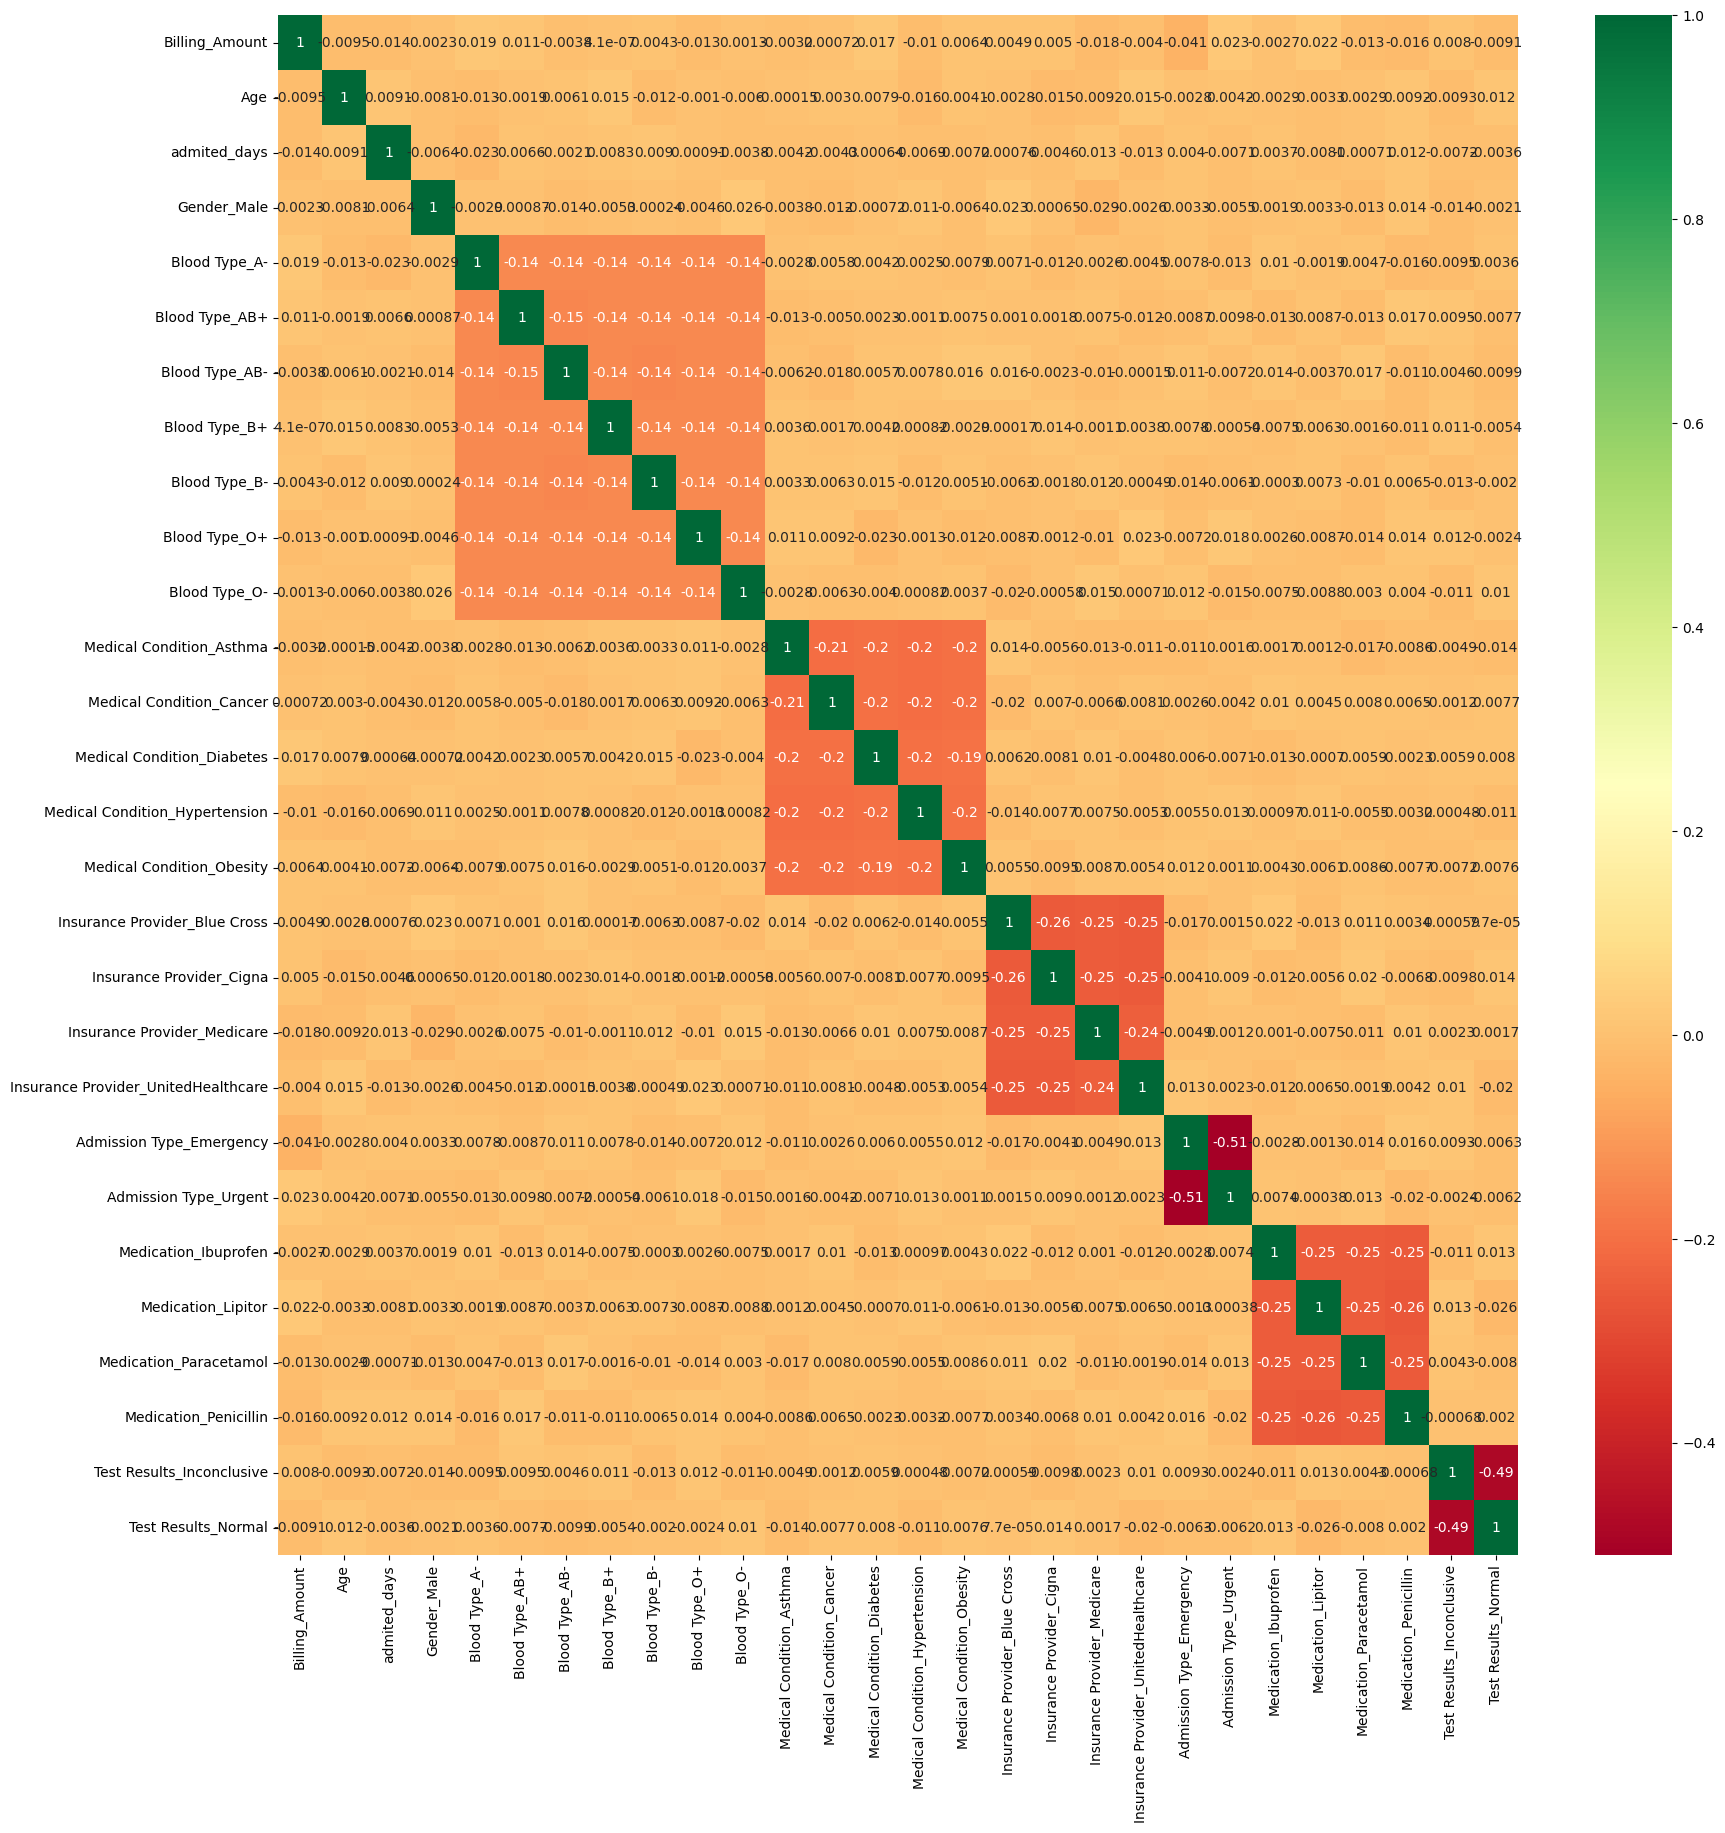

In [32]:
# Check correlation b/w variables
cor_mat=df_final.corr()
top_cor_features=cor_mat.index
plt.figure(figsize=(20,20))

# heatmap
g= sns.heatmap(df_final[top_cor_features].corr(), annot=True, cmap="RdYlGn")

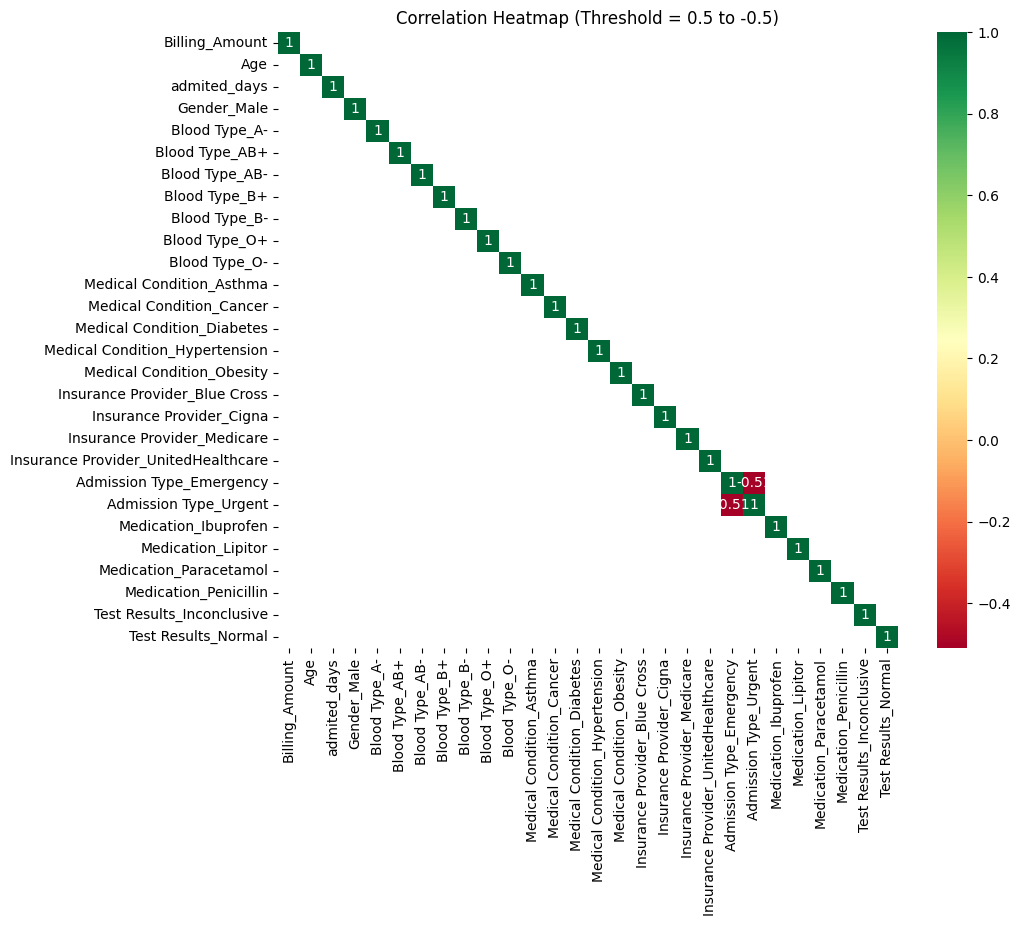

In [33]:
# Check correlation b/w variables only for corr above 0.5
#cor_mat=df_final.corr()
# Filter correlations above threshold
threshold_max = 0.5
threshold_min = -0.5
high_correlation = cor_mat[(cor_mat > threshold_max) | (cor_mat<threshold_min)]

# Create heatmap
plt.figure(figsize=(10, 8))
g = sns.heatmap(high_correlation, annot=True, cmap="RdYlGn")
plt.title(f"Correlation Heatmap (Threshold = {threshold_max} to {threshold_min})")
plt.show()

In [34]:
# From above no independent variable looks correlated with each other

In [35]:
df_final.columns

Index(['Billing_Amount', 'Age', 'admited_days', 'Gender_Male', 'Blood Type_A-',
       'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-',
       'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity',
       'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna',
       'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare',
       'Admission Type_Emergency', 'Admission Type_Urgent',
       'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin', 'Test Results_Inconclusive',
       'Test Results_Normal'],
      dtype='object')

In [36]:
df_final.shape

(10000, 28)

In [37]:
#definding my all independent variables
X= df_final.iloc[:,1:]

In [38]:
#definding my all Dependent variables
y= df_final.iloc[:,0]

In [39]:
X.shape

(10000, 27)

In [40]:
X.describe()

,Age,admited_days
count,10000.000000,10000.000000
mean,51.452200,15.561800
std,19.588974,8.612038
min,18.000000,1.000000
25%,35.000000,8.000000
50%,52.000000,16.000000
75%,68.000000,23.000000
max,85.000000,30.000000


In [41]:
##Importance of Features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [42]:
print(model.feature_importances_)

[0.16379274 0.15620917 0.0572526  0.02480477 0.02666982 0.0296188
 0.02619574 0.02528412 0.02187161 0.03014307 0.02779049 0.02912652
 0.01207153 0.0172204  0.03209264 0.03199434 0.02981263 0.03018528
 0.03440623 0.00167665 0.03979186 0.02678087 0.02174519 0.02019259
 0.02086542 0.04310659 0.01929833]


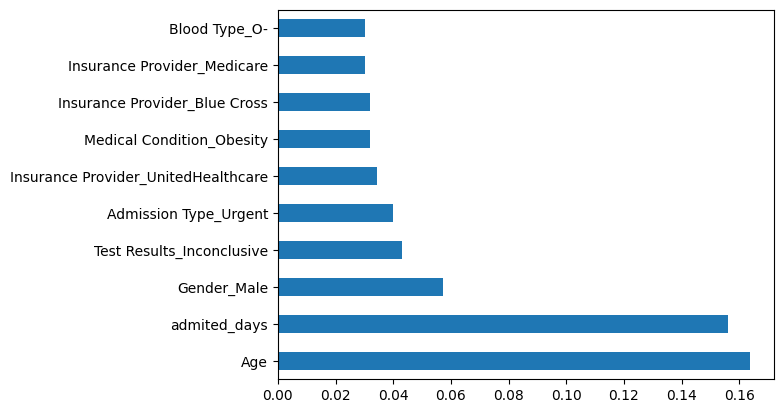

In [43]:
#plot graph of feature importance for better visualization

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance .nlargest(10).plot(kind='barh')  # can chnage (kind= 'bar') also
plt.show()

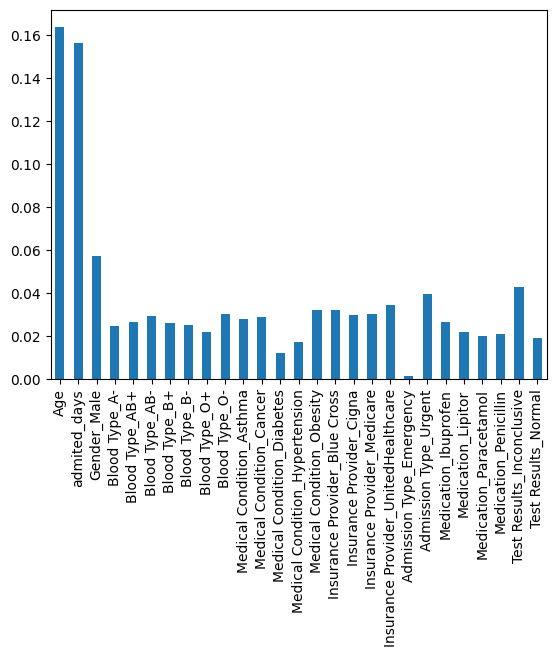

In [44]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.plot(kind='bar')
plt.show()

In [45]:
## Model building on features as above
# Calling test train Spl
from sklearn.model_selection import train_test_split

In [46]:
#identification
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [47]:
## Random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [48]:
#for random hyper tuning parameter selection:
from sklearn.model_selection import RandomizedSearchCV
## Alternat search is import GridSearchCV

In [49]:
#import numpy as np
import numpy as np

In [50]:
#Hyperparameters
#a) estimators
n_estimators =  [int(x) for x in np.linspace(start =100, stop =1200, num = 12)]
#b max_features: number of features at every split = ['auto','sqrt']
max_features= ['auto','sqrt']
#c) Max numbers of levels-i.e. depth
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
#d) Max_depth.append(None)
#e) Min number of samples required at split a node
min_samples_split = [2,5,10,15,100]
#f) Min number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [51]:
# Creat Random Grid
random_grid ={'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [52]:
# Define base model for hyper tuning
rf = RandomForestRegressor()

In [53]:
# Starting my randomized search for Hypertuning
rf_random =  RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring= 'neg_mean_squared_error', n_iter =10, cv = 5, verbose=2, random_state = 42, n_jobs = 1)
#estimator = ML model Type
#cv = cross validation
# verbose = 2, help to show iter progress

In [54]:
# Linking Train data into model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  16.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  16.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\abhib\anaconda3\envs\healthcarebill\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abhib\anaconda3\envs\healthcarebill\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhib\anaconda3\envs\healthcarebill\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\abhib\anaconda3\envs\healthcarebill\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    val

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
#Check for prediction on Test data set
predictions = rf_random.predict(X_test)

In [56]:
# Chec predection
print(predictions)

[25383.6667564  25568.81289587 25079.88536011 ... 26488.64837211
 25410.68792307 25532.52647532]


C:\Users\abhib\AppData\Local\Temp\ipykernel_18252\1444292668.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Billing_Amount', ylabel='Density'>

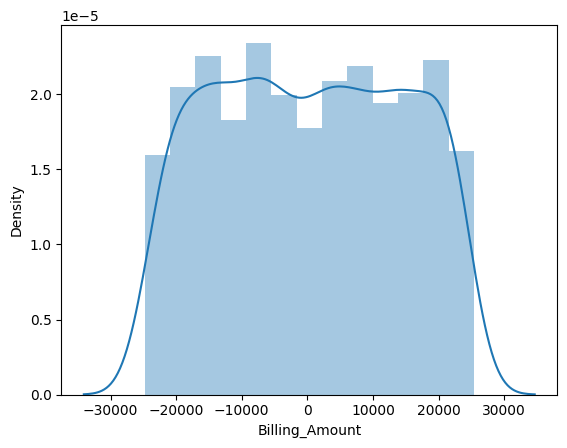

In [57]:
# Check the output of prediction by subtracting y_test and Prediction output from model
sns.distplot(y_test-predictions)

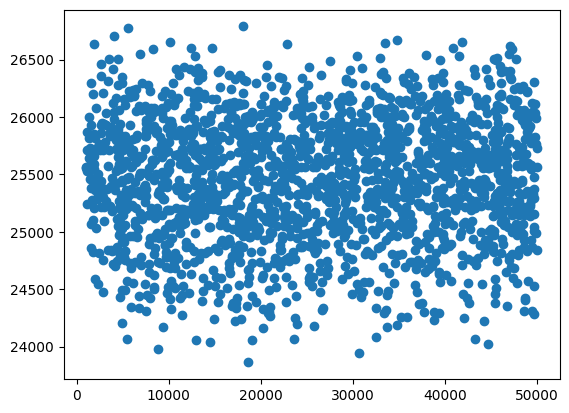

In [59]:
## output in scatterplot
plt.scatter(y_test, predictions)

In [62]:
## Check model with simple linear regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [64]:
# Scaling the independent variables
scaler = StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [67]:
# Predicting on the test set
y_pred = model_lr.predict(X_test_scaled)

C:\Users\abhib\AppData\Local\Temp\ipykernel_18252\2654575396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='Billing_Amount', ylabel='Density'>

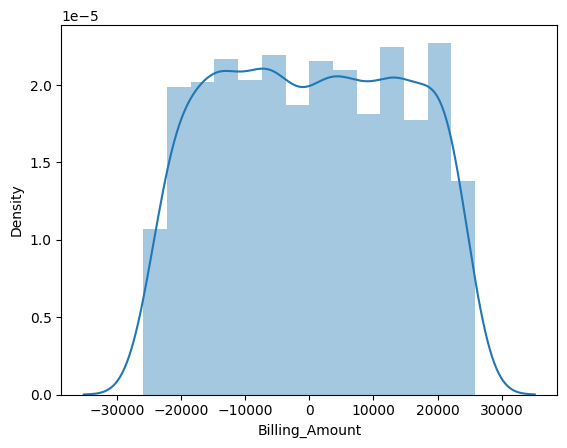

In [68]:
# Check the output of prediction by subtracting y_test and Prediction output from model
sns.distplot(y_test-y_pred)

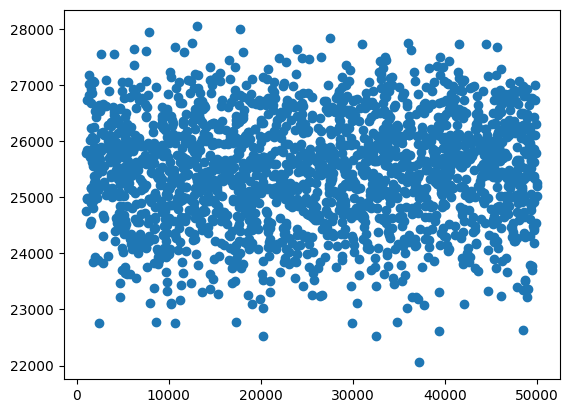

In [69]:
## output in scatterplot
plt.scatter(y_test, y_pred)

In [70]:
# Now with neural Networks

In [71]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
# Scaling the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Defining the neural network architecture
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

In [74]:
# Compiling the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
# Training the model
model_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
250/250 [==============================] - 3s 4ms/step - loss: 842505472.0000
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 806114880.0000
Epoch 3/50
250/250 [==============================] - 1s 4ms/step - loss: 688261120.0000
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 499294624.0000
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 323518400.0000
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 229405280.0000
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 202342128.0000
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 197704352.0000
Epoch 9/50
250/250 [==============================] - 1s 4ms/step - loss: 196895984.0000
Epoch 10/50
250/250 [==============================] - 1s 4ms/step - loss: 196483872.0000
Epoch 11/50
250/250 [==============================] - 1s 4ms/step - loss: 196201680.0000
Epoch 12/50
250/250

In [76]:
# Evaluating the model
y_pred_nn = model_nn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error:", mse)

63/63 [==============================] - 0s 3ms/step
Mean Squared Error: 202918496.0805713


C:\Users\abhib\AppData\Local\Temp\ipykernel_18252\2938433341.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color='blue', label='Actual')
C:\Users\abhib\AppData\Local\Temp\ipykernel_18252\2938433341.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_

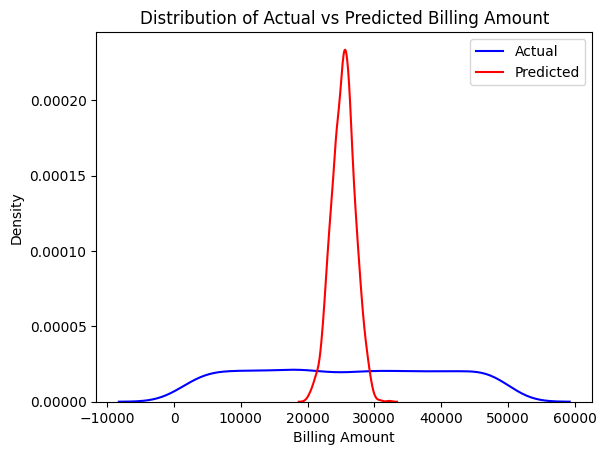

In [77]:
# Plotting the distribution of actual vs predicted values
sns.distplot(y_test, hist=False, color='blue', label='Actual')
sns.distplot(y_pred_nn, hist=False, color='red', label='Predicted')
plt.xlabel('Billing Amount')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Billing Amount')
plt.legend()
plt.show()

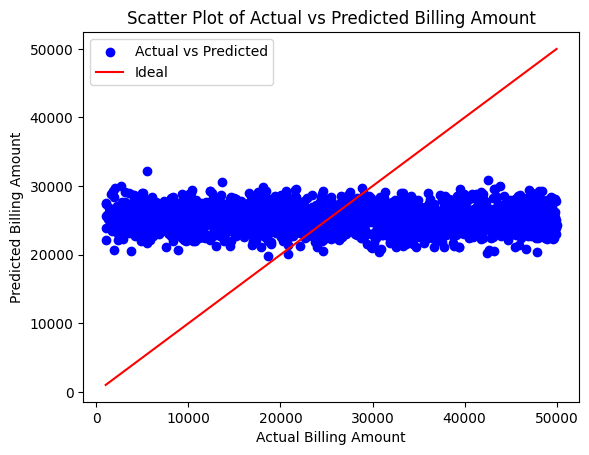

In [78]:
# Plotting scatter plot with different colors
plt.scatter(y_test, y_pred_nn, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal')
plt.xlabel('Actual Billing Amount')
plt.ylabel('Predicted Billing Amount')
plt.title('Scatter Plot of Actual vs Predicted Billing Amount')
plt.legend()
plt.show()

In [79]:
# For Stastical signifience
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score


In [81]:
# 1st for RandomForest
# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, predictions)
#accuracy_rf = accuracy_score(y_test, predictions)
#recall_rf = recall_score(y_test, predictions)
#f1_rf = f1_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error-RF:", mse_rf)
#print("Accuracy-RF:", accuracy_rf)
#print("Recall-RF:", recall_rf)
#print("F1 Score-RF:", f1_rf)

Mean Squared Error-RF: 199912673.3212793


In [82]:
# 2nd for linear
# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred)
#accuracy_rf = accuracy_score(y_test, predictions)
#recall_rf = recall_score(y_test, predictions)
#f1_rf = f1_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error-LR:", mse_lr)
#print("Accuracy-RF:", accuracy_rf)
#print("Recall-RF:", recall_rf)
#print("F1 Score-RF:", f1_rf)

Mean Squared Error-LR: 200186483.26901475


In [83]:
#3rd for NN
# Calculate evaluation metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
#accuracy_rf = accuracy_score(y_test, predictions)
#recall_rf = recall_score(y_test, predictions)
#f1_rf = f1_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error-RF:", mse_nn)
#print("Accuracy-RF:", accuracy_rf)
#print("Recall-RF:", recall_rf)
#print("F1 Score-RF:", f1_rf)

Mean Squared Error-RF: 202918496.0805713


In [86]:
#Final step pickle file
import pickle
#open a file , where you want to store the data
file_hcb = open('healthcarebill_random_forest_regression.pkl', 'wb')

#dump the selected model
pickle.dump(rf_random,file_hcb)